# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine

# Challenge 0 - Import a MySQL table into python:

In this lab, we will twist things up a little. Do you remember your good old friend SQL?
Well, it's time to bring him back and use it in our lab pipeline.

1º- Open the wholesale_customers_data.sql file in MySQL Workbench and run the script into a desired schema.

2º- Create a connection using sqlalchemy from python to mysql and load the table into a variable called *customers*

In [ ]:
#Create a connection with create_engine to MySQL Workbench:
from sqlalchemy import create_engine
import pandas as pd

host = "localhost"  
port = "3306"       
user = "root"       
password =   
database = "wholesale_customers_db"  

connection_string = f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}"

engine = create_engine(connection_string)

query = "SELECT * FROM wholesale_customers_data;"  # Substitua pelo nome exato da tabela
customers = pd.read_sql(query, con=engine)

print(customers.head())


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [ ]:
#Create a connection with create_engine to MySQL Workbench:
from sqlalchemy import create_engine
import pandas as pd

host = "localhost"  
port = "3306"       
user = "root"       
password =   
database = "wholesale_customers_db"  

connection_string = f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}"

engine = create_engine(connection_string)

query = "SELECT * FROM wholesale_customers_data;"  # Substitua pelo nome exato da tabela
customers = pd.read_sql(query, con=engine)

print(customers.head())

# Challenge 1 - Describe the Dataset

Your already loaded dataset contains information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

In case of curiosity, the origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [ ]:
# Your code here:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("First rows of the dataset:")
print(customers.head())

print("\nDataset info:")
print(customers.info())

print("\nDescriptive statistics:")
print(customers.describe())

print("\nMissing values per column:")
print(customers.isnull().sum())

print("\nUnique values per column:")
for column in customers.columns:
    print(f"{column}: {customers[column].nunique()} unique values")




First rows of the dataset:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           2200 non-null   int64
 1   Region            2200 non-null   int64
 2   Fresh             2200 non-null   int64
 3   Milk              2200 non-null   int64
 4   Grocery           2200 non-null   int64
 5   Frozen            2200 non-null   int64
 6   Detergents_Pa

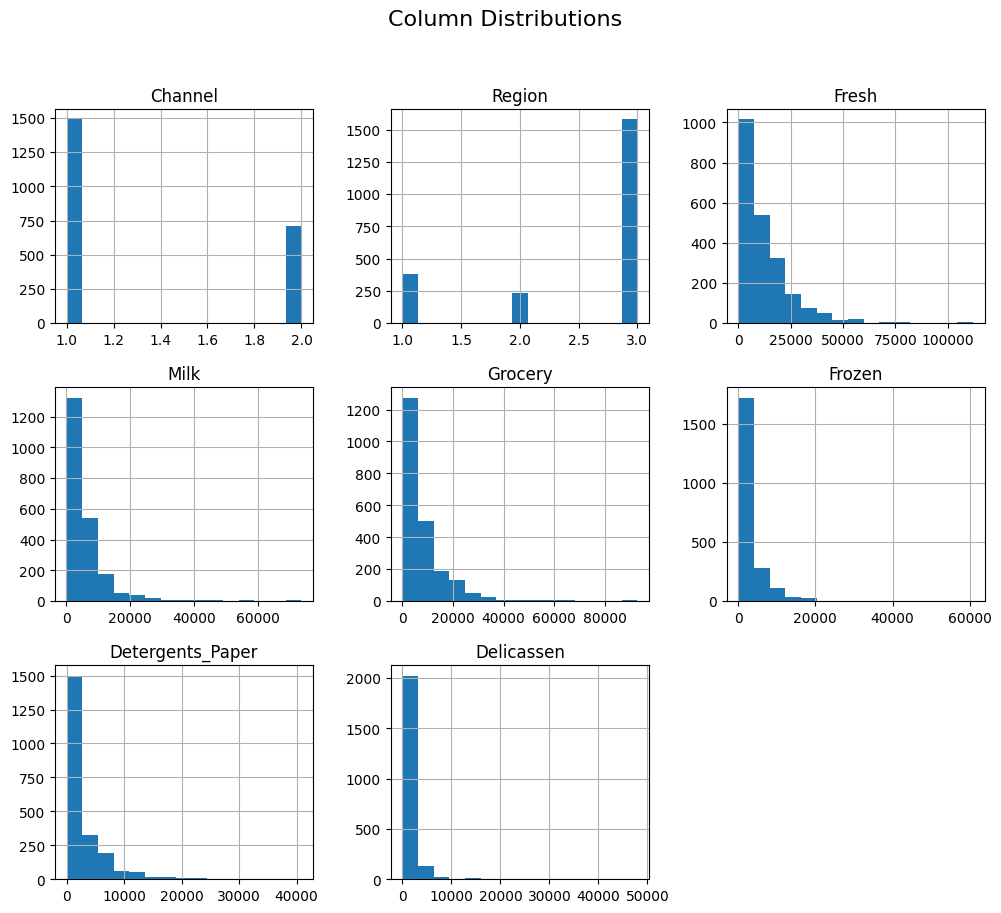

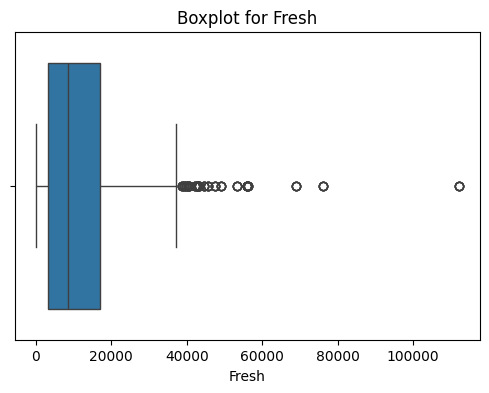

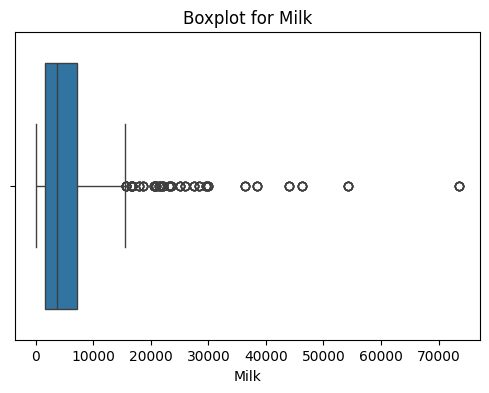

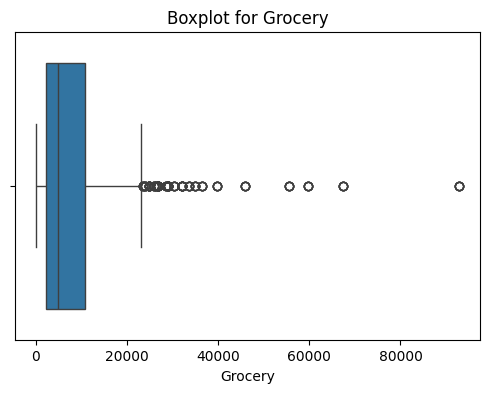

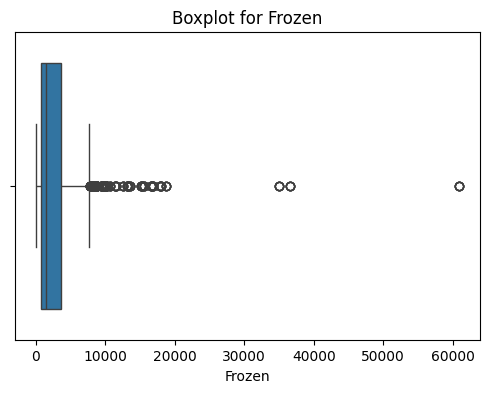

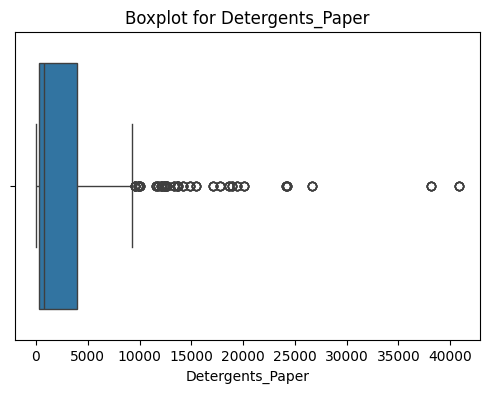

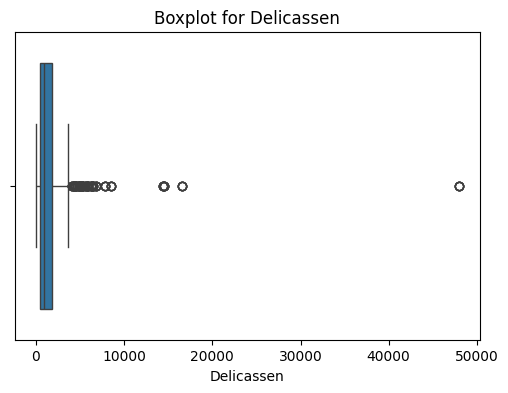

In [4]:
# Plot histograms for numeric columns
customers.hist(figsize=(12, 10), bins=15)
plt.suptitle("Column Distributions", fontsize=16)
plt.show()

# Boxplots to identify outliers
columns = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]
for col in columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=customers, x=col)
    plt.title(f"Boxplot for {col}")
    plt.show()



Correlation Matrix:
                   Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel           1.000000  0.062028 -0.169172  0.460720  0.608792 -0.202046   
Region            0.062028  1.000000  0.055287  0.032288  0.007696 -0.021044   
Fresh            -0.169172  0.055287  1.000000  0.100510 -0.011854  0.345881   
Milk              0.460720  0.032288  0.100510  1.000000  0.728335  0.123994   
Grocery           0.608792  0.007696 -0.011854  0.728335  1.000000 -0.040193   
Frozen           -0.202046 -0.021044  0.345881  0.123994 -0.040193  1.000000   
Detergents_Paper  0.636026 -0.001483 -0.101953  0.661816  0.924641 -0.131525   
Delicassen        0.056011  0.045212  0.244690  0.406368  0.205497  0.390947   

                  Detergents_Paper  Delicassen  
Channel                   0.636026    0.056011  
Region                   -0.001483    0.045212  
Fresh                    -0.101953    0.244690  
Milk                      0.661816    0.406368  
Grocery      

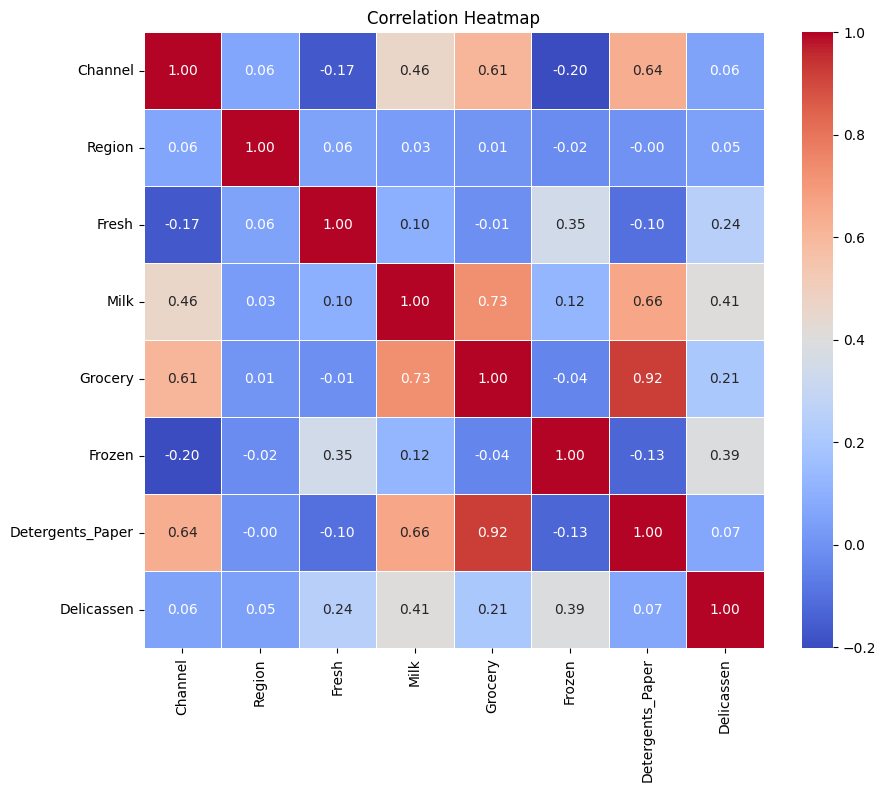

In [ ]:
# Correlation matrix
corr_matrix = customers.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



Percentage of customers contributing 80% of total spend: 57.05%


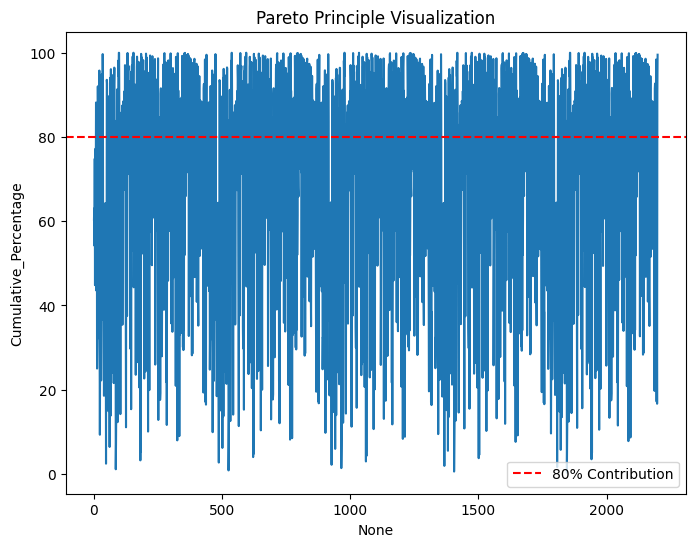

In [ ]:
customers['Total_Spend'] = customers[columns].sum(axis=1)

pareto_data = customers.sort_values(by='Total_Spend', ascending=False)

pareto_data['Cumulative_Percentage'] = pareto_data['Total_Spend'].cumsum() / pareto_data['Total_Spend'].sum() * 100

top_20 = pareto_data[pareto_data['Cumulative_Percentage'] <= 80]
percent_top_20 = len(top_20) / len(customers) * 100

print(f"\nPercentage of customers contributing 80% of total spend: {percent_top_20:.2f}%")

plt.figure(figsize=(8, 6))
sns.lineplot(data=pareto_data, x=pareto_data.index, y='Cumulative_Percentage')
plt.axhline(80, color="red", linestyle="--", label="80% Contribution")
plt.title("Pareto Principle Visualization")
plt.legend()
plt.show()


The dataset has 2200 entries with 8 columns, and there are no missing values.
All columns are integers, which simplifies data processing.
Columns Channel and Region likely represent categorical data, while the rest are numerical.
The unique value counts show variability in spending patterns, especially in Grocery, Frozen, and other spending-related columns.
The dataset is clean and ready for further analysis or visualization.

Most spending distributions are heavily right-skewed, with many customers spending little and a few spending significantly more.
All numeric columns, such as Fresh, Milk, Frozen, etc., contain numerous outliers as shown in the boxplots.
Columns like Channel and Region appear categorical and evenly distributed, with Channel having two main categories.
The skewness and outliers might affect clustering; I should consider transformations (e.g., log scale) and handling outliers before proceeding.

Grocery, Milk, and Detergents_Paper show strong positive correlations, especially between Grocery and Detergents_Paper (0.92).
Frozen, Fresh, and Delicassen have weak correlations with other variables, indicating potential independence.
Channel is moderately correlated with Grocery and Detergents_Paper, suggesting some relationship with spending patterns.
These correlations suggest dimensionality reduction or feature selection might help simplify clustering.

Only 57.05% of customers contribute to 80% of total spending, which does not align with the typical Pareto principle (20% customers contributing 80%).
Spending is more evenly distributed across customers than expected.
This suggests no extreme concentration of spending in a small group of customers.


# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [ ]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

scaler = StandardScaler()

columns_to_scale = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]

customers_scale = scaler.fit_transform(customers[columns_to_scale])

customers_scale = pd.DataFrame(customers_scale, columns=columns_to_scale)

print(customers_scale.head())


      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.052933  0.523568 -0.041115 -0.589367         -0.043569   -0.066339
1 -0.391302  0.544458  0.170318 -0.270136          0.086407    0.089151
2 -0.447029  0.408538 -0.028157 -0.137536          0.133232    2.243293
3  0.100111 -0.624020 -0.392977  0.687144         -0.498588    0.093411
4  0.840239 -0.052396 -0.079356  0.173859         -0.231918    1.299347


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [ ]:
# Your code here:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed

kmeans.fit(customers_scale)

customers['labels'] = kmeans.labels_

print(customers.head())


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Total_Spend  labels  
0        1338        34112       0  
1        1776        33266       0  
2        7844        36610       0  
3        1788        27381       0  
4        5185        46100       0  


Count the values in `labels`.

In [ ]:
# Your code here:
label_counts = customers['labels'].value_counts()

print("\nCluster label counts:")
print(label_counts)



Cluster label counts:
labels
0    1930
1     215
2      55
Name: count, dtype: int64


# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [ ]:
# Your code here
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed

dbscan.fit(customers_scale)

customers['labels_DBSCAN'] = dbscan.labels_

print(customers.head())


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Total_Spend  labels  labels_DBSCAN  
0        1338        34112       0              0  
1        1776        33266       0              0  
2        7844        36610       0              1  
3        1788        27381       0              0  
4        5185        46100       0              2  


Count the values in `labels_DBSCAN`.

In [ ]:
# Your code here
dbscan_label_counts = customers['labels_DBSCAN'].value_counts()

print("\nDBSCAN cluster label counts:")
print(dbscan_label_counts)



DBSCAN cluster label counts:
labels_DBSCAN
0      1400
12       30
28       20
50       15
99       15
       ... 
138       5
139       5
140       5
141       5
142       5
Name: count, Length: 143, dtype: int64


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

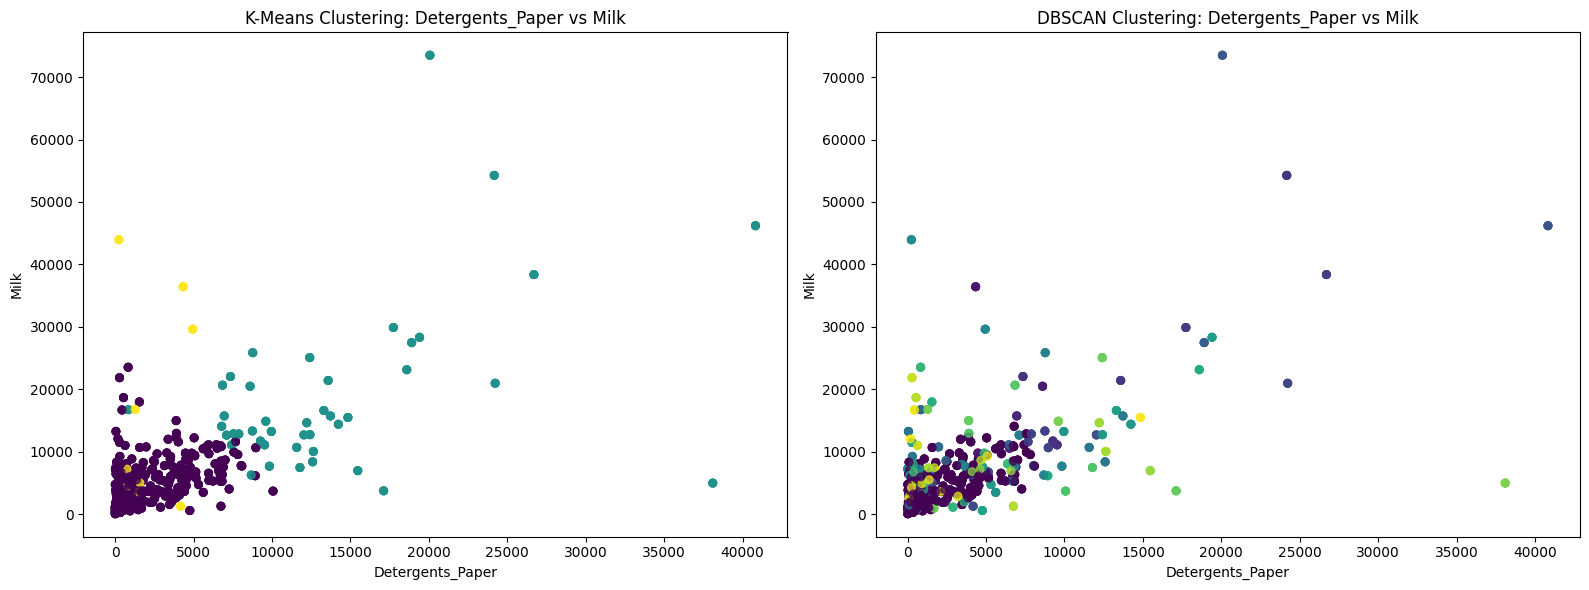

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

# K-Means Clustering
plt.subplot(1, 2, 1)
plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels'], cmap='viridis', s=30, alpha=0.7)
plt.title("K-Means Clustering: Detergents_Paper vs Milk")
plt.xlabel("Detergents_Paper")
plt.ylabel("Milk")

# DBSCAN Clustering
plt.subplot(1, 2, 2)
plt.scatter(customers['Detergents_Paper'], customers['Milk'], c=customers['labels_DBSCAN'], cmap='viridis', s=30, alpha=0.7)
plt.title("DBSCAN Clustering: Detergents_Paper vs Milk")
plt.xlabel("Detergents_Paper")
plt.ylabel("Milk")

plt.tight_layout()
plt.show()



Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

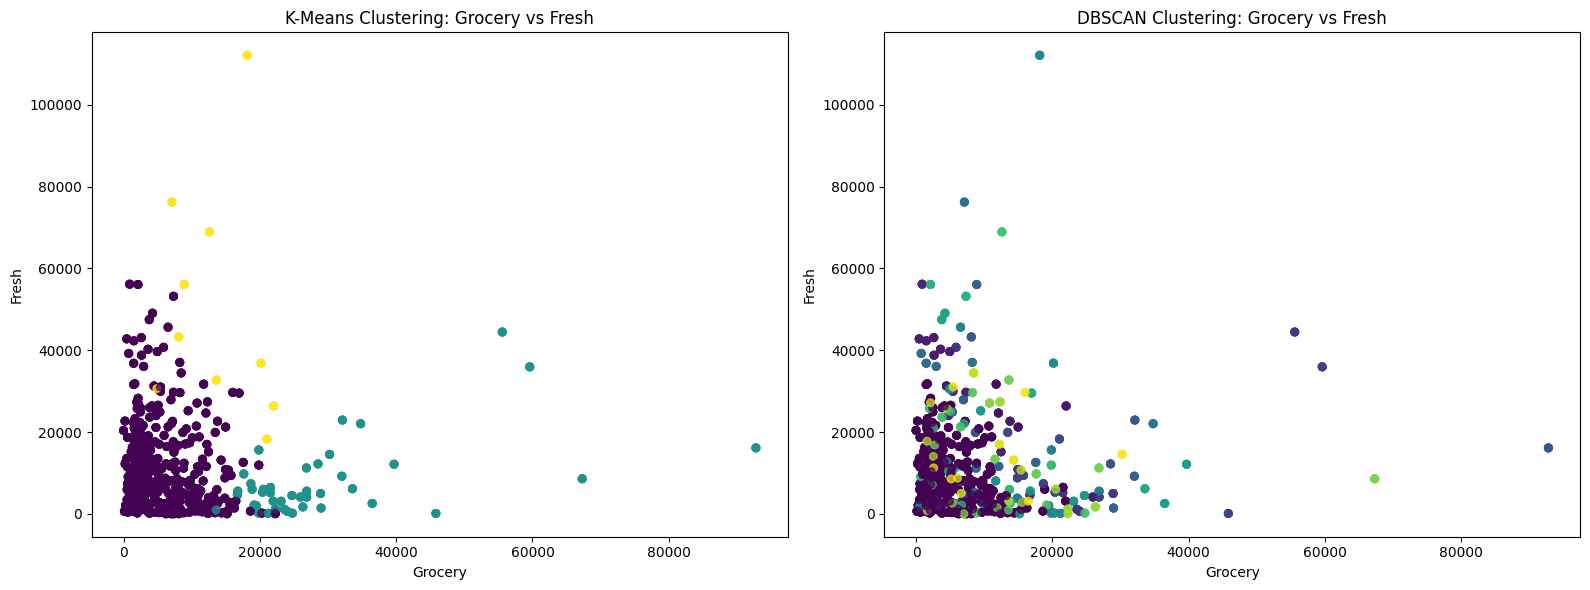

In [ ]:
# Your code here:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

# K-Means Clustering
plt.subplot(1, 2, 1)
plt.scatter(customers['Grocery'], customers['Fresh'], c=customers['labels'], cmap='viridis', s=30, alpha=0.7)
plt.title("K-Means Clustering: Grocery vs Fresh")
plt.xlabel("Grocery")
plt.ylabel("Fresh")

# DBSCAN Clustering
plt.subplot(1, 2, 2)
plt.scatter(customers['Grocery'], customers['Fresh'], c=customers['labels_DBSCAN'], cmap='viridis', s=30, alpha=0.7)
plt.title("DBSCAN Clustering: Grocery vs Fresh")
plt.xlabel("Grocery")
plt.ylabel("Fresh")

plt.tight_layout()
plt.show()


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

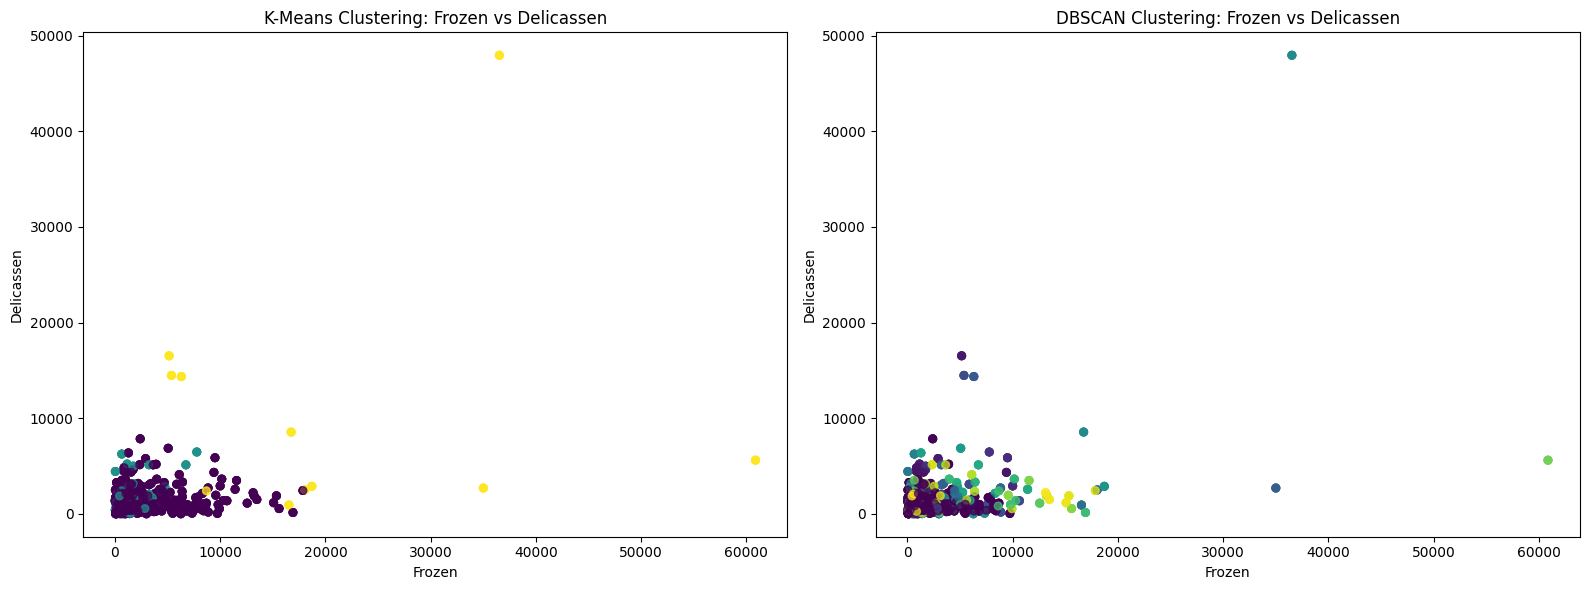

In [ ]:
# Your code here:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

# K-Means Clustering
plt.subplot(1, 2, 1)
plt.scatter(customers['Frozen'], customers['Delicassen'], c=customers['labels'], cmap='viridis', s=30, alpha=0.7)
plt.title("K-Means Clustering: Frozen vs Delicassen")
plt.xlabel("Frozen")
plt.ylabel("Delicassen")

# DBSCAN Clustering
plt.subplot(1, 2, 2)
plt.scatter(customers['Frozen'], customers['Delicassen'], c=customers['labels_DBSCAN'], cmap='viridis', s=30, alpha=0.7)
plt.title("DBSCAN Clustering: Frozen vs Delicassen")
plt.xlabel("Frozen")
plt.ylabel("Delicassen")

plt.tight_layout()
plt.show()


Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [ ]:
# Your code here:
kmeans_means = customers.groupby('labels').mean()

dbscan_means = customers.groupby('labels_DBSCAN').mean()

print("K-Means Cluster Means:")
print(kmeans_means)

print("\nDBSCAN Cluster Means:")
print(dbscan_means)


K-Means Cluster Means:
         Channel    Region         Fresh          Milk       Grocery  \
labels                                                                 
0       1.253886  2.544041  11492.126943   4117.243523   5467.634715   
1       2.000000  2.488372   7705.069767  18752.069767  29054.813953   
2       1.090909  2.727273  46622.909091  14069.272727  12608.909091   

              Frozen  Detergents_Paper    Delicassen    Total_Spend  \
labels                                                                
0        2712.494819       1702.072539   1218.479275   26710.051813   
1        1782.837209      13731.767442   1901.534884   72928.093023   
2       20724.090909       1853.727273  10804.000000  106682.909091   

        labels_DBSCAN  
labels                 
0           19.826425  
1           58.674419  
2           58.272727  

DBSCAN Cluster Means:
                Channel    Region         Fresh          Milk       Grocery  \
labels_DBSCAN                         

Which algorithm appears to perform better?

K-Means performs better for separating distinct spending groups due to its clear cluster means. DBSCAN identifies noise effectively but produces smaller, less distinct clusters, making it less effective for this structured dataset.

# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here